<div class="alert alert-block alert-success">
    <h1 align="center"> Audio Processing using KNN</h1>
    <h3 align="center">Sound Classification</h3>
    <h4 align="center">Rohit Chaudhary</h4>
    <h4 align= "center">Roll no. : 25 </h4>
</div>

# Introduction
**Sound Classification** is one of the most widely used applications in Data mining. 
- to classify sounds and to predict the category of that sound.
- classifying music clips to identify the genre of the music, or classifying short utterances by a set of speakers to identify the speaker based on the voice.

# K-Nearest Neighbors Algorithm

- a supervised machine learning algorithm (with both a target variable and independent variables) 

 **target variable or dependent **variable, == **y**

The **independent variables**, denoted **x** (single valued) or X (multi valued)


- used for both **classification**(for categorical target variable) and **regression** (for numeric target).



**Basic Assumption:**

All instances correspond to points in the `n-dimensional` space where `n` represents the number of features in any instance.

The nearest neighbors of an instance are defined in terms of the `Euclidean` distance.

An instance can be represented by `< x1, x2, .............., xn >`.

Euclidean distance between two instances xa and xb is given by $d( x_a, x_b )$

$$Distance(x,y) = \sqrt{\sum_{j=1}^{n}(x_j^a -x_j^b)^2} $$




## About dataset

- contains 8732 labeled sound excerpts (<=4s) of urban sounds 
- 10 classes: **air_conditioner, car_horn, children_playing, dog_bark, drilling, enginge_idling, gun_shot, jackhammer, siren, and street_music**. The classes are drawn from the **urban sound taxonomy**.
- All excerpts are taken from field recordings uploaded to **www.freesound.org**. The files are pre-sorted into 
- ten folds (folders named fold1-fold10) 
- In addition to the sound excerpts, a CSV file containing metadata about each excerpt is also provided.\

It consists of two parts:

1. Audio files in the ‘audio’ folder
2. Metadata in the ‘metadata’ folder: It has a file ‘UrbanSound8K.csv’ .


# What we will do:

#### 1. Import sound files, 
#### 2. convert them into spectrograms, 
#### 3. use KNNclassifier, and produce predictions 
#### 4. Measure the accuracy


# Importing Necessary Libraries

In [89]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns

# Specific Libraries
import os
import librosa
import librosa.display

from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split 
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from tqdm import tqdm, trange
from tqdm.auto import tqdm


import IPython.display as ipd

# Analysing Data Type and Format

In [59]:
df = pd.read_csv("C:/Users/Dell/OneDrive/Desktop/Projects/Audio_Classification_using_KNN/2/UrbanSound8K.csv")
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


##### Column Names

* slice_file_name: 
The name of the audio file. The name takes the following format: [fsID]-[classID]-[occurrenceID]-[sliceID].wav

* fsID:
The Freesound ID of the recording from which this excerpt (slice) is taken

* start
The start time of the slice in the original Freesound recording

* end:
The end time of slice in the original Freesound recording

* salience:
A (subjective) salience rating of the sound. 1 = foreground, 2 = background.

* fold:
The fold number (1-10) to which this file has been allocated.

* classID:
A numeric identifier of the sound class:
0 = air_conditioner
1 = car_horn
2 = children_playing
3 = dog_bark
4 = drilling
5 = engine_idling
6 = gun_shot
7 = jackhammer
8 = siren
9 = street_music

* class:
The class name: air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, 
siren, street_music.

#### Using Librosa to analyse random sound sample - SPECTROGRAM

In [63]:
ipd.Audio("C:/Users/Dell/OneDrive/Desktop/Projects/Audio_Classification_using_KNN/2/audio/fold1/46669-4-0-24.wav")

In [64]:
ipd.Audio('C:/Users/Dell/OneDrive/Desktop/Projects/Audio_Classification_using_KNN/2/audio/fold5/100263-2-0-117.wav')

In [4]:
dat1, sampling_rate1 = librosa.load("C:/Users/Dell/OneDrive/Desktop/Projects/Audio_Classification_using_KNN/2/audio/fold1/46669-4-0-24.wav")
dat2, sampling_rate2 = librosa.load('C:/Users/Dell/OneDrive/Desktop/Projects/Audio_Classification_using_KNN/2/audio/fold5/100263-2-0-117.wav')

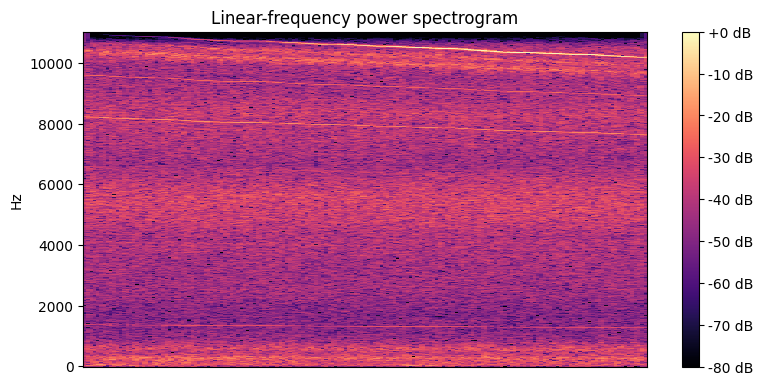

In [65]:
plt.figure(figsize=(20, 20))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

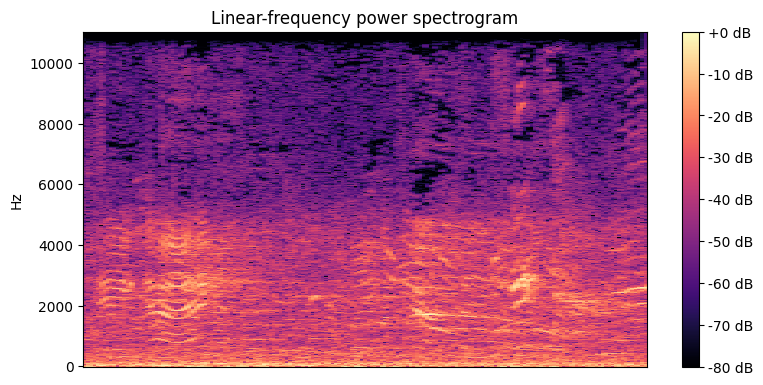

In [66]:
plt.figure(figsize=(20, 20))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat2)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

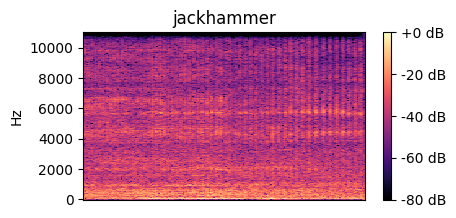

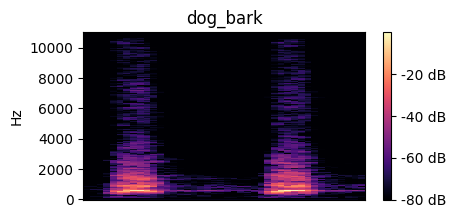

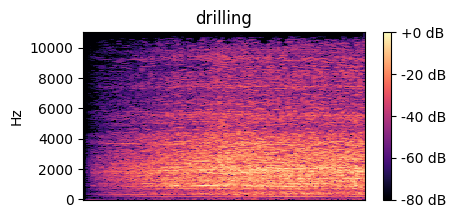

In [13]:
arr = np.array(df["slice_file_name"])
fold = np.array(df["fold"])
cla = np.array(df["class"])

for i in range(192, 197, 2):
    path = 'C:/Users/Dell/OneDrive/Desktop/Projects/Audio_Classification_using_KNN/2/audio/fold' + str(fold[i]) + '/' + arr[i]
    data, sampling_rate = librosa.load(path)
    plt.figure(figsize=(10, 10))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    plt.subplot(4, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(cla[i])

# Feature Extraction and Database Building

## Mel Spectrograms

* This raw audio is now converted to Mel Spectrograms. A Spectrogram captures the nature of the audio as an image by decomposing it into the set of frequencies that are included in it.

## MFCC

* For human speech, in particular, it sometimes helps to take one additional step and convert the Mel Spectrogram into MFCC (Mel Frequency Cepstral Coefficients). MFCCs produce a *compressed representation of the Mel Spectrogram by extracting only the most essential frequency coefficients*, which correspond to the frequency ranges at which humans speak.

#### Method

1. used Librosa to extract features.
2. went through each fold and extracted the data for each file.
3. After reshaping and cleaning the data, 80-20 split has been performed.


## MFCC
- one amongst the most popular features, because it provides data about the overall shape of the audio frequencies. 
- stands for Mel-Frequency Cepstral Coefficients
- used in speech and audio signal processing for tasks such as speech recognition, speaker identification, and music genre classification
- a representation of the short-term power spectrum of a sound, which are derived from the Fourier transform of a signal
- a compact representation of the spectral envelope of a signal, leveraging principles of human auditory perception.

#### Steps to Compute MFCCs:
##### 1. Pre-emphasis:
Optionally, apply a pre-emphasis filter to boost the high-frequency components of the signal.

##### 2. Frame Blocking:
Divide the audio signal into short frames (e.g., 20-30 milliseconds) with overlap.

##### 3. Windowing:
Apply a window function (e.g., Hamming window) to each frame to reduce spectral leakage.

##### 4. Fast Fourier Transform (FFT):
Compute the power spectrum of each frame using the FFT.

##### 5. Mel Filter Bank:
Apply a bank of Mel-spaced triangular filters to the power spectrum.

##### 6. Logarithmic Compression:
Compute the logarithm of the filter bank outputs.

##### 7. Discrete Cosine Transform (DCT):
Apply the DCT to the log-filter bank outputs to obtain the MFCCs.

#### Applications of MFCCs:
##### 1. Speech Recognition:
MFCCs are commonly used as feature vectors in automatic speech recognition systems.
They capture essential characteristics of speech sounds that are robust to variations in pitch and pronunciation.

##### 2. Speaker Identification:
MFCCs can be used to identify speakers based on unique characteristics of their voice.

##### 3. Audio Classification:
In music and sound classification tasks, MFCCs are effective features for identifying genres or acoustic events.


# Extracting Features using mfcc

For this , the package called librosa is used to extract about 50 features from the sound file

In [67]:
def features_extract(file):
    sample,sample_rate = librosa.load(file_name,res_type='kaiser_fast')
    feature = librosa.feature.mfcc(y=sample,sr=sample_rate,n_mfcc=50)
    scaled_feature = np.mean(feature.T,axis=0)
    return scaled_feature

extracted = []
path = 'C:/Users/Dell/OneDrive/Desktop/Projects/Audio_Classification_using_KNN/2/audio/'

for index_num,row in tqdm(df.iterrows()):
    file_name = os.path.join(os.path.abspath(path),'fold'+str(row["fold"])+'/',str(row['slice_file_name'])) 
    final_class_labels = row['class']   
    data= features_extract(file_name)    
    extracted.append([data,final_class_labels])

0it [00:00, ?it/s]

KeyboardInterrupt: 

In [74]:
ext_df = pd.DataFrame(extracted,columns=['feature','class'])
ext_df

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing
...,...,...
81,"[-250.47076, 52.479477, 22.59877, 37.67644, -1...",air_conditioner
82,"[-244.63286, 46.519634, 25.13874, 36.8961, -14...",air_conditioner
83,"[-192.99338, 17.797287, 21.342016, 38.833008, ...",air_conditioner
84,"[-235.6568, 38.19678, 27.118954, 36.922745, -1...",air_conditioner


In [73]:
x = np.array(ext_df['feature'].tolist())
y = np.array(ext_df['class'].tolist())

In [71]:
print("Shape of features:",x.shape)
print("Shape of target variables:",y.shape)

Shape of features: (8732, 50)
Shape of target variables: (8732,)


# Spliting data to fit model

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

print("Number of training samples = ", x_train.shape[0])
print("Number of testing samples = ",x_test.shape[0])

Number of training samples =  6985
Number of testing samples =  1747


# Model Creation

In [75]:
def most_common(lst):
    return max(set(lst), key=lst.count)

In [76]:
def euclidean(point, data):
    # Euclidean distance between points a & data
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [77]:
class KNNClassifier:
    def __init__(self, k):
        self.k = k
        self.distance_method = euclidean

    def make_model(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict_class(self, x_test):
        neighbors = []
        for x in x_test:
            distances = self.distance_method(x, self.x_train)
            y_sorted = [y for _, y in sorted(zip(distances,self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))

    def evaluate(self, x_test, y_test):
        y_pred = self.predict_class(x_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

# Applying KNNClassifier when k = 3

In [78]:
k = 3

knn = KNNClassifier(k=3)
knn.make_model(x_train, y_train)

computed_y_test = knn.predict_class(x_test)

In [80]:
# Check how it is computing the output
list(zip(computed_y_test, y_test))

[('siren', 'siren'),
 ('street_music', 'street_music'),
 ('drilling', 'drilling'),
 ('siren', 'siren'),
 ('dog_bark', 'dog_bark'),
 ('jackhammer', 'jackhammer'),
 ('children_playing', 'children_playing'),
 ('children_playing', 'children_playing'),
 ('drilling', 'drilling'),
 ('dog_bark', 'dog_bark'),
 ('street_music', 'street_music'),
 ('drilling', 'drilling'),
 ('gun_shot', 'gun_shot'),
 ('street_music', 'street_music'),
 ('jackhammer', 'jackhammer'),
 ('dog_bark', 'dog_bark'),
 ('air_conditioner', 'air_conditioner'),
 ('engine_idling', 'engine_idling'),
 ('siren', 'siren'),
 ('gun_shot', 'gun_shot'),
 ('engine_idling', 'engine_idling'),
 ('children_playing', 'children_playing'),
 ('air_conditioner', 'air_conditioner'),
 ('dog_bark', 'dog_bark'),
 ('air_conditioner', 'air_conditioner'),
 ('siren', 'siren'),
 ('engine_idling', 'engine_idling'),
 ('siren', 'siren'),
 ('air_conditioner', 'air_conditioner'),
 ('children_playing', 'car_horn'),
 ('dog_bark', 'dog_bark'),
 ('engine_idling', 

In [81]:
y_pred = knn.predict_class(x_test)
accuracy = sum(y_pred == y_test) / len(y_test)

print(f"Accuracy = {accuracy}")

Accuracy = 0.8666285060103034


# Taking value k from 1 to 10

In [83]:
accuracies = []

ks = range(1,10)
for k in ks:
    knn = KNNClassifier(k)
    knn.make_model(x_train, y_train)
    knn.predict_class(x_train)
    accuracy = knn.evaluate(x_test, y_test)
    accuracies.append(accuracy)

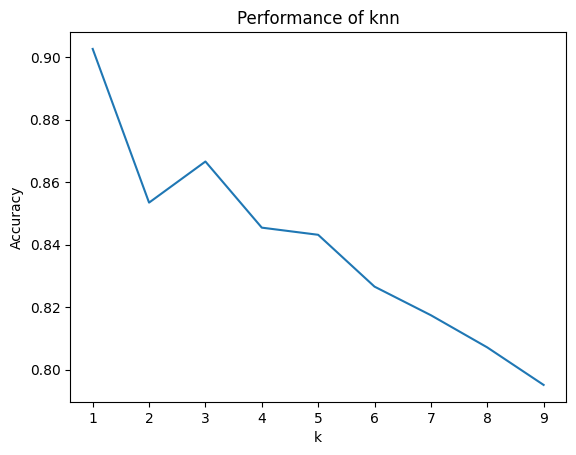

In [84]:
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

# Confusion matrix

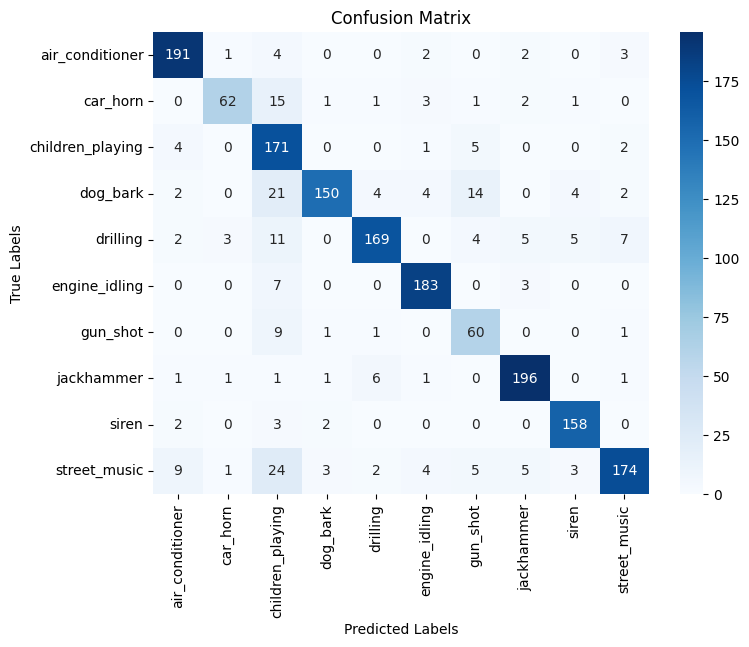

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example predictions and true labels (replace with your actual data)
y_true = [0, 1, 2, 0, 1, 2, 0, 1, 2]  # True class labels
y_pred = [0, 1, 2, 0, 2, 1, 0, 1, 2]  # Predicted class labels

# Compute confusion matrix
cm = confusion_matrix(y_test, computed_y_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["air_conditioner","car_horn","children_playing","dog_bark","drilling","engine_idling","gun_shot","jackhammer",
                         "siren", "street_music"], 
            yticklabels=["air_conditioner","car_horn","children_playing","dog_bark","drilling","engine_idling","gun_shot","jackhammer",
                         "siren", "street_music"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()